In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import acquire as ac
import prepare as pr

import wrangle as wr
import model as mo

# Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?


In [2]:
df = wr.get_zillow_data()

In [3]:
df = wr.change_zillow(df)

In [4]:
df.shape


(77614, 61)

In [5]:
df=wr.handle_missing_val(df, .98 , .98)

In [6]:
df.shape

(75181, 32)

In [7]:
df = wr.change_dtype(df)

In [8]:
df

,parcelid,logerror,transactiondate,id,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,14297519,0.025595,2017-01-01,1727539,0,3.5,4,3.5,3100,Orange,...,96978,0,0,1998,485713,1023282,2016,537569,11013.72,6.059063e+13
1,17052889,0.055619,2017-01-01,1387261,0,1.0,2,1.0,1465,Ventura,...,97099,5,0,1967,88000,464000,2016,376000,5672.48,6.111001e+13
2,14186244,0.005383,2017-01-01,11677,0,2.0,3,2.0,1243,Orange,...,97078,6,0,1962,85289,564778,2016,479489,6488.30,6.059022e+13
3,12177905,-0.103410,2017-01-01,2288172,0,3.0,4,3.0,2376,Los Angeles,...,96330,0,1,1970,108918,145143,2016,36225,1777.51,6.037300e+13
4,10887214,0.006940,2017-01-01,1970746,0,3.0,3,3.0,1312,Los Angeles,...,96451,0,1,1964,73681,119407,2016,45726,1533.89,6.037124e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77609,11000655,0.020615,2017-09-20,673515,0,2.0,2,2.0,1286,Los Angeles,...,96284,0,1,1940,70917,354621,2016,283704,4478.43,6.037101e+13
77610,17239384,0.013209,2017-09-21,2968375,0,2.0,4,2.0,1612,Ventura,...,97116,7,0,1964,50683,67205,2016,16522,1107.48,6.111008e+13
77611,12773139,0.037129,2017-09-21,1843709,0,1.0,3,1.0,1032,Los Angeles,...,96480,0,1,1954,32797,49546,2016,16749,876.43,6.037434e+13
77612,12826780,0.007204,2017-09-25,1187175,0,2.0,3,2.0,1762,Los Angeles,...,96171,0,1,1955,140000,522000,2016,382000,6317.15,6.037503e+13


# What is the distribution of logerror

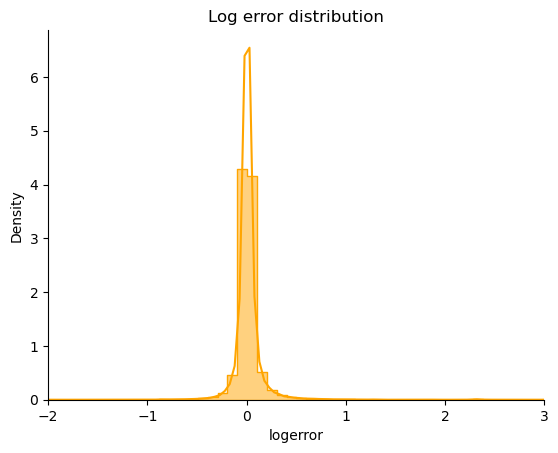

In [9]:
# create a histogram of the 'logerror' column
sns.histplot(data=df, x='logerror', kde=True, stat='density', element='step', color='orange',bins = 100)

# Add title, x and y axis labels
plt.title("Log error distribution")
plt.xlabel("logerror")
plt.ylabel("Density")
plt.xlim(-2,3)
sns.despine()
# Show the plot
plt.show()

In [10]:
# anything above 0 means the estimate is overestimating the sales price,
# under means underestimating

In [11]:
# what ever features are associated with the values closer to zero should be evaluated

# is log error associated with time?

In [12]:
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

In [13]:
df['transactiondate_month'] =df['transactiondate'].dt.month
df['transactiondate_year'] = df['transactiondate'].dt.year

In [14]:
df.logerror.max()

5.2629986498

In [15]:
bins = pd.cut(df['logerror'], bins = [-4.7, -2, -0.5,0.5,2.0,5.26],labels=['very low', 'low', 'medium', 'high','very high'])
df['logerror_bin'] = bins



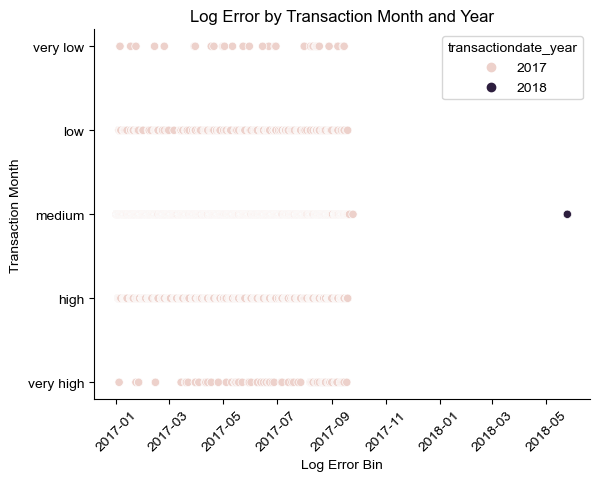

In [16]:
sns.scatterplot(data = df, y = 'logerror_bin', x = 'transactiondate', hue = 'transactiondate_year')
plt.xlabel('Log Error Bin')
plt.ylabel('Transaction Month')
plt.title('Log Error by Transaction Month and Year')

plt.xticks(rotation =45 )
plt.xticks(fontsize = 10)
sns.set_style('ticks')
sns.despine()

In [22]:
heat_input = df.corr()
heat_input

,parcelid,logerror,id,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fireplacecnt,fullbathcnt,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transactiondate_month,transactiondate_year
parcelid,1.000000,0.009880,-0.002803,0.035610,0.007908,0.027152,0.007908,0.028986,0.449309,-0.057237,...,-0.571703,0.204787,0.003908,0.000012,NaN,-0.001772,-0.019928,0.099820,0.000208,0.000212
logerror,0.009880,1.000000,0.001381,0.004698,0.025993,0.029349,0.025993,0.037356,0.003530,0.023593,...,-0.014486,0.005727,0.002638,0.000344,NaN,-0.000751,-0.001362,0.004793,0.003974,-0.004670
id,-0.002803,0.001381,1.000000,0.006452,0.004644,0.003176,0.004644,0.005548,-0.002079,0.005693,...,0.003543,-0.000979,0.004195,0.002168,NaN,0.000957,0.001546,-0.003850,-0.000080,0.004069
basementsqft,0.035610,0.004698,0.006452,1.000000,0.027210,0.011747,0.027210,0.015114,0.070337,0.025016,...,-0.020856,-0.000318,0.006953,0.008701,NaN,0.008367,0.006877,0.007180,-0.004181,-0.000066
bathroomcnt,0.007908,0.025993,0.004644,0.027210,1.000000,0.615315,1.000000,0.805650,0.110115,0.984260,...,0.092953,0.367245,0.600075,0.483821,NaN,0.367575,0.488090,0.003328,0.008235,-0.001149
bedroomcnt,0.027152,0.029349,0.003176,0.011747,0.615315,1.000000,0.615315,0.662936,0.138148,0.609961,...,0.156888,0.035997,0.316149,0.254069,NaN,0.192553,0.260940,0.010143,0.005540,-0.000232
calculatedbathnbr,0.007908,0.025993,0.004644,0.027210,1.000000,0.615315,1.000000,0.805650,0.110115,0.984260,...,0.092953,0.367245,0.600075,0.483821,NaN,0.367575,0.488090,0.003328,0.008235,-0.001149
calculatedfinishedsquarefeet,0.028986,0.037356,0.005548,0.015114,0.805650,0.662936,0.805650,1.000000,0.175526,0.784899,...,0.037802,0.215368,0.710472,0.590135,NaN,0.458167,0.592702,0.006983,0.006952,-0.002821
fireplacecnt,0.449309,0.003530,-0.002079,0.070337,0.110115,0.138148,0.110115,0.175526,1.000000,0.067128,...,-0.367238,0.124477,0.072275,0.059039,NaN,0.045289,0.036992,0.080035,0.009289,-0.001170
fullbathcnt,-0.057237,0.023593,0.005693,0.025016,0.984260,0.609961,0.984260,0.784899,0.067128,1.000000,...,0.173564,0.320653,0.584746,0.471886,NaN,0.358749,0.478763,-0.005759,0.007976,-0.000913


In [ ]:
mask = np.zeros_like(heat_input)
mask[np.triu_indices_from(mask)] = True


<AxesSubplot:>

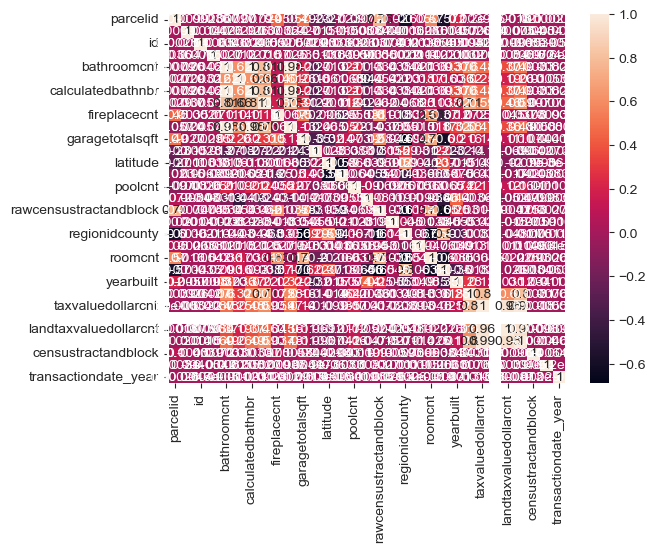

In [21]:
sns.heatmap(heat_input,  annot= True)

# Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [35]:
la_log_avg = df[df.fips == 'Los Angeles'].logerror

In [36]:
or_log_avg = df[df.fips == 'Orange'].logerror

In [37]:
ve_log_avg = df[df.fips == 'Ventura'].logerror

In [38]:
la_log_avg,or_log_avg,ve_log_avg

(3       -0.103410
 4        0.006940
 6       -0.001011
 7        0.101723
 8       -0.040966
            ...   
 77608   -0.002245
 77609    0.020615
 77611    0.037129
 77612    0.007204
 77613   -0.197755
 Name: logerror, Length: 49280, dtype: float64,
 0        0.025595
 2        0.005383
 12      -0.028835
 13       0.045602
 14      -0.008935
            ...   
 77150    0.175712
 77154   -0.013833
 77164   -0.020225
 77188    0.091490
 77227    0.010171
 Name: logerror, Length: 19817, dtype: float64,
 1        0.055619
 5       -0.020526
 15       0.008669
 55      -0.095340
 80       0.027817
            ...   
 76751    0.042637
 76755    0.014572
 76758   -0.014314
 76772    0.062956
 77610    0.013209
 Name: logerror, Length: 6084, dtype: float64)

In [42]:
a = .05

In [43]:
t, p = stats.f_oneway(la_log_avg, or_log_avg, ve_log_avg)

In [45]:
if p < a:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")


We reject $H_{0}$


## there is a significant difference in the mean between counties

In [50]:
df.calculatedfinishedsquarefeet.max()

21929

In [51]:
df.calculatedfinishedsquarefeet.min()

152

In [52]:
bins = pd.cut(df['calculatedfinishedsquarefeet'], bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 21999]
,labels = ['very low', 'low', 'medium low', 'medium', 'medium high', 'high','very high','super high','ultra high','extra high','mega high'])

df['finishedsqft_bin'] = bins

In [57]:
# group dataframe by the square footage
df_grouped = df.groupby(df['finishedsqft_bin']).mean()


In [58]:
df_grouped

,parcelid,logerror,id,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fireplacecnt,fullbathcnt,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transactiondate_month,transactiondate_year
finishedsqft_bin,,,,,,,,,,,,,,,,,,,,,
very low,1.290886e+07,0.013489,1.493459e+06,0.286798,1.936775,2.686558,1.936775,1333.817142,0.089658,1.885285,...,0.703460,1965.629652,1.256428e+05,3.421539e+05,2016.0,2.165112e+05,4247.423379,6.049071e+13,5.041664,2017.000018
low,1.309758e+07,0.020614,1.495907e+06,0.682789,3.053630,3.948974,3.053630,2642.576486,0.224939,2.956841,...,0.730467,1974.374615,2.831680e+05,7.055044e+05,2016.0,4.223364e+05,8524.486372,6.051266e+13,5.117041,2017.000000
medium low,1.298461e+07,0.048085,1.538906e+06,2.930105,4.815355,4.968630,4.815355,4667.195927,0.285636,4.638415,...,0.894882,1981.831040,7.145412e+05,1.703713e+06,2016.0,9.891723e+05,20013.666401,6.050404e+13,5.044029,2017.000000
medium,1.312533e+07,0.055690,1.480055e+06,1.092000,5.942000,5.248000,5.942000,6735.260000,0.448000,5.732000,...,0.640000,1985.388000,1.305148e+06,3.303335e+06,2016.0,1.998187e+06,37939.369800,6.052656e+13,4.904000,2017.000000
medium high,1.258588e+07,0.098394,1.484009e+06,0.000000,6.852113,5.619718,6.852113,8745.352113,0.239437,6.661972,...,0.704225,1989.816901,2.225555e+06,5.878949e+06,2016.0,3.653395e+06,68935.436479,6.047482e+13,4.746479,2017.000000
high,1.204978e+07,0.012565,1.626182e+06,0.000000,8.180000,6.280000,8.180000,10881.360000,0.160000,8.080000,...,0.880000,1986.960000,3.252461e+06,7.225158e+06,2016.0,3.972698e+06,87820.485600,6.042122e+13,5.000000,2017.000000
very high,1.124949e+07,0.037029,2.365634e+06,0.000000,6.250000,5.000000,6.250000,12577.250000,0.000000,6.250000,...,1.000000,1996.750000,3.455853e+06,6.784578e+06,2016.0,3.328725e+06,81715.122500,6.037198e+13,4.250000,2017.000000
super high,1.165514e+07,-0.507775,1.510914e+06,0.000000,9.000000,6.000000,9.000000,15450.000000,0.000000,9.000000,...,1.000000,1992.000000,4.212875e+06,1.007102e+07,2016.0,5.858143e+06,121131.530000,6.037261e+13,5.000000,2017.000000
ultra high,1.086224e+07,0.124167,1.985578e+06,0.000000,11.000000,10.000000,11.000000,17245.000000,0.000000,11.000000,...,1.000000,1992.000000,6.932495e+06,7.924751e+06,2016.0,9.922560e+05,95561.620000,6.037142e+13,8.000000,2017.000000


In [59]:
# extract the log error column
log_error = df_grouped['logerror']

In [60]:
log_error

finishedsqft_bin
very low       0.013489
low            0.020614
medium low     0.048085
medium         0.055690
medium high    0.098394
high           0.012565
very high      0.037029
super high    -0.507775
ultra high     0.124167
extra high     0.448665
mega high     -0.144444
Name: logerror, dtype: float64

In [62]:
# perform the t-test
t, p = stats.ttest_ind(log_error['very low'], log_error['high'],equal_var= False)

/var/folders/d0/5dr5q0n145vcn3_m9dxy1xq80000gn/T/ipykernel_10754/2740729101.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(log_error['very low'], log_error['high'],equal_var= False)
/usr/local/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [64]:
print("Reject $H_{0}$? ", p < a)

Reject $H_{0}$?  False


In [80]:
#"There is not a significant difference between the lowest bin and highest bin"

In [81]:
avg_sqft = df.calculatedfinishedsquarefeet.mean()

In [82]:
above_avg = df[df.calculatedfinishedsquarefeet > avg_sqft]

In [83]:
below_avg = df[df.calculatedfinishedsquarefeet < avg_sqft]

In [84]:
t, p = stats.ttest_ind(above_avg.logerror,below_avg.logerror,equal_var= False)

In [85]:
print("Reject $H_{0}$? ", p < a)

Reject $H_{0}$?  True
